In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk, freqz, dimpulse, dlsim, dlti
from scipy.special import binom

# Lab 2 - Transformée en Z

*Arden Diakahte-Palme (et ceux de votre groupe)* - *Votre SCIPER (et ceux de votre groupe)*

Scéance le 20.10.2021, à rendre pour le 3.11.2021

# 1. Fonction de transfert (5 pts)


On considère la fonction de transfert:

$$
H(z) = \frac{0.2066+0.4132z^{-1}+0.2066z^{-2}}{1-0.3695z^{-1}+0.1958z^{-2}}
$$

### 1.1 Filtre, pôles et zéros
Trouver les pôles et les zéros de $H(z)$. Vous pouvez vous aider de la fonction [tf2zpk](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.tf2zpk.html). Quel est le gain de ce filtre ?
Le gain de ce filtre est 0.2066

In [23]:
def H(z):
    P= 0.2066 + (0.4132 / z) + (0.2066 / (z ** 2))
    Q= 1 - (0.3695 / z) + (0.1958 / (z ** 2))
    return P/Q;

b= np.array([0.2066, 0.4132, 0.2066])
a= np.array([1, -0.3695, 0.1958])

(z, p, k)= tf2zpk(b,a)
print((z,p,k))

(array([-1., -1.]), array([0.18475+0.40207889j, 0.18475-0.40207889j]), 0.2066)


Dessiner les pôles et les zéros  de $H(z)$ dans le plan complexe.

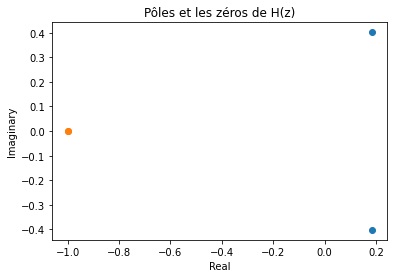

In [24]:
fig, ax1 = plt.subplots(1)
ax1.set_xlabel('Real')
ax1.set_ylabel('Imaginary')
ax1.set_title('Pôles et les zéros de H(z)')

ax1.scatter(p.real,p.imag)
ax1.scatter(z.real,z.imag)
plt.show()

### 1.2 Réponse en fréquence


Tracer la réponse en fréquence (amplitude et phase) du filtre $H(z)$. Utiliser $N=1024$ points. Vous pouvez vous aider de la fonction [freqz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html). Quel genre de filtre est $H$ (passe-bas, passe-bande, passe-haut) ? Le flitre $H$ est un filtre passe-bas.

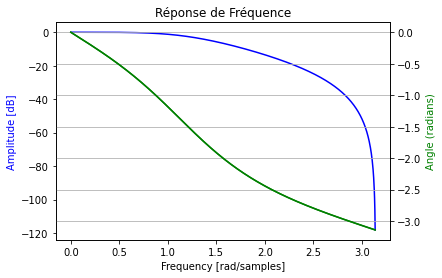

In [40]:
N= 1024 #points
w, h= freqz(b,a,N)

fig, ax1 = plt.subplots(1)
ax1.set_xlabel('Frequency [rad/samples]')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_title('Réponse de Fréquence')
ax1.plot(w, 20 * np.log10(abs(h)), color='b')

ax2 = ax1.twinx()
angles_rad = np.unwrap(np.angle(h))
ax2.plot(w, angles_rad, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.plot(w, angles_rad, color='g')
ax2.grid()

plt.show()


### 1.3 Réponse impultionelle

* Tracer les 64 premiers points de la réponse impulsionnelle (dirac) du filtre $H$ à l'aide la fonction [dimpulse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dimpulse.html). Vous pouvez utiliser la fonction [stem](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html) pour tracer la réponse.

* Cette fois, tracer les 64 premiers points de la réponse impulsionnelle $h[n]$ du filtre $H$ à l'aide la fonction [dlsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlsim.html). Quelle est la différence entre ces deux fonctions ? Le résultat est-il le même ?

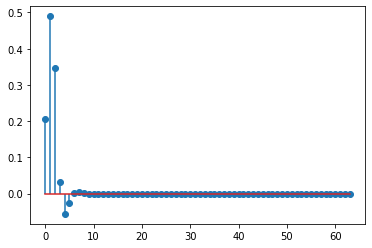

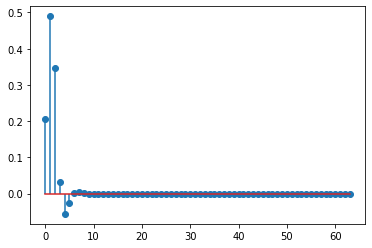

In [93]:
tout, yout= dimpulse((b,a,1), n=64)

fig, ax1 = plt.subplots(1)
plt.stem(tout, np.squeeze(yout))
plt.show()


dirac_delta= np.zeros((1,64))
dirac_delta= np.squeeze(dirac_delta)
dirac_delta[0]= 1.0;

tout1, yout1= dlsim((b,a,1), dirac_delta)
plt.stem(tout1, np.squeeze(yout1))

plt.show()

### 1.3 Réponse d'un signal discret

On considère le signal:
$$
    x[n] = \cos(0.2\pi n) + cos(0.8\pi n)
$$
Utiliser ce que vous avez appris lors des points précédents pour tracer:
* la magnitude et la phase du signal. (Hint: vu qu’on a un signal de durée limitée, sa transformée Z va avoir un dénominateur à 1, et les coefficients de son numérateur seront exactement celle du signal original).
* le résultat du signal x[n] filtré par $H(z)$ ainsi que sa réponse fréquentielle. Quel est l'effet du filtre sur notre signal ?

TypeError: 'numpy.float64' object cannot be interpreted as an integer

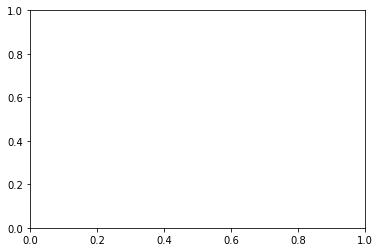

In [106]:
def x(n):
    return np.cos(0.2*np.pi*n) + np.cos(0.8*np.pi*n)

fig, ax1 = plt.subplots(1)
n= np.linspace(0,

ax1.plot(n,x(n))
plt.show()

# 2. Système causal (4 pts)

Soit une famille de systèmes parametrée par $N$ avec transformées en z suivantes:

$$ H_N(z) = (z^{-1} - 2)^N - z^{-N} $$


1. Donnez une formule pour les réponses impulsionelles de ces systèmes.

*Votre réponse ici*

2. Calculez, numériquement pour $N \in \{2, 4, 6, 10\}$ les zéros de ces systèmes et affichez les sur un diagramme pôles-zéros. Vous pouvez vous aider de la fonction `scipy.special.binom`.

In [ ]:
# Votre réponse ici

3. Sur la base de la position des zéros uniquement, quel est le type de cette famille de filtres (passe-haut, passe-bas, passe-bande, coupe-bande)?

*Votre réponse ici*

4. Affichez leurs réponses en fréquence (en amplitude et en phase, avec une échelle logarithmique pour le premier) pour les valeurs $N \in \{2, 4, 6, 10\}$. Quel est l'effet de l'augmentation de $N$? (Avant d'afficher la réponse en amplitude des filtres, normaliser leur gain, i.e. divisez les coeficients de la réponse impulsionelle par la somme de leurs valeurs absolues)

In [ ]:
# Votre réponse ici

5. Répétez les points 2.,3. et 4. pour les systèmes du type:
$$ \hat{h}_N[n] = \begin{cases} h_N[n/2] \text{ si } n \text{ pair} \\ 0 \text{ sinon}\end{cases}$$
où $h_N$ est la réponse impulsionelle des filtres définis ci-dessus. Quelle est l'effet de la transformation $h_N \implies \hat{h}_N$ ? Justifiez. 

In [ ]:
# Votre réponse ici

# 3. Stabilité (3 pts)

Soit les systèmes suivant:
$$ G_1(z) = \frac{1 + 0.3 z^{-1}}{1 + 0.8z^{-1} - 0.3 z^{-2}}$$
$$ G_2(z) = \frac{1 + 0.3 z^{-1}}{1 + 0.5z^{-1} - 0.3 z^{-2}}$$
1. Pour les deux systèmes, affichez les 32 premiers éléments de leurs réponses impulsionelles ainsi que leur pôles et leurs zéros sur le diagramme du même nom. Est-ce que les systèmes sont stables ? Justifiez.

In [ ]:
# Votre réponse ici

2.Supposons qu'en fait le système $G_\alpha(z)$ soit implémenté avec une puce électronique défectueuse qui présente une valeur de $\alpha$ uniformément distribuée entre $0$ et $1$ à chaque fois que le système est utilisé.
$$ G_\alpha(z) = \frac{1 + 0.3 z^{-1}}{1 + \alpha z^{-1} - 0.3 z^{-2}}$$
Estimez numériquement la probabilité que le système $G_a(z)$ soit stable. Vous pouvez vous aider de la fonction `np.random.rand()`.

In [ ]:
# Votre réponse ici